In [1]:
#%% load model
import tensorflow.compat.v1 as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
file =  '/home/bhe/Icey/ML10_1station_up_dn/3+4+5_56wdc'
os.chdir(file)

from keras.models import model_from_yaml
yaml_file = open('model_m_SNR3+4+5_56wdc_d1_updn_1.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
model_m = model_from_yaml(loaded_model_yaml)
# load weights into new model
model_m.load_weights('model_m_SNR3+4+5_56wdc_d1_updn_1.h5')
print("Loaded model from disk")
model_m.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

/home/bhe/.conda/envs/bhepy36/lib/python3.6/site-packages/tensorflow/python/keras/saving/model_config.py:88: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


Loaded model from disk


In [2]:
## smooth data
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

im= 0


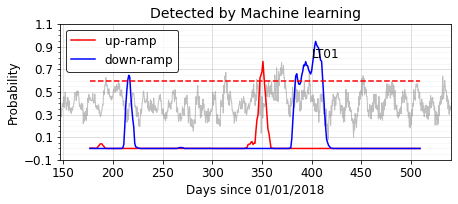

im= 1


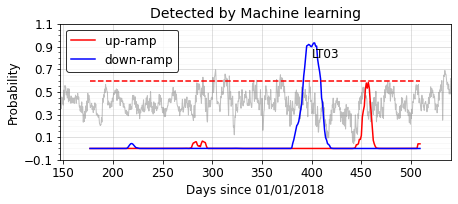

im= 2


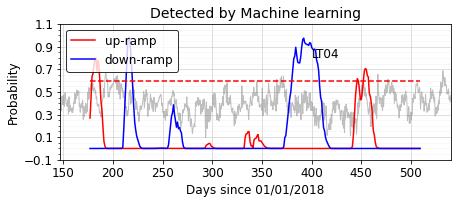

im= 3


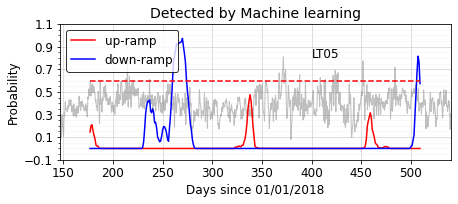

im= 4


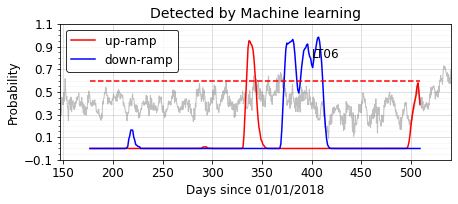

im= 5


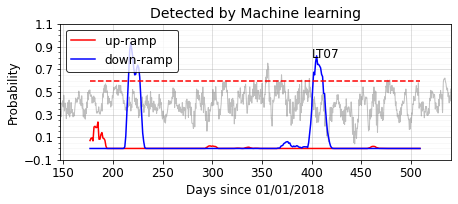

im= 6


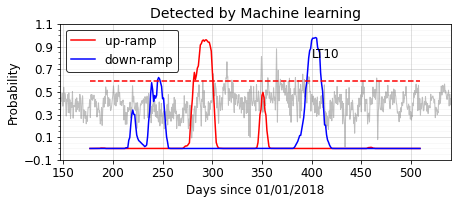

im= 7


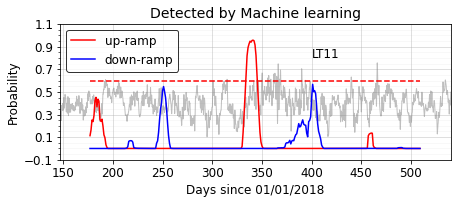

im= 8


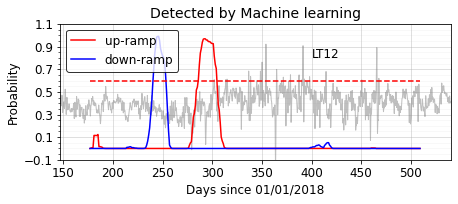

im= 9


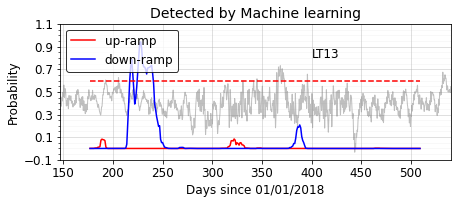

im= 10


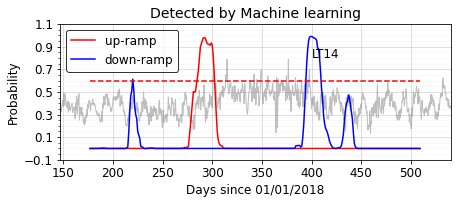

im= 11


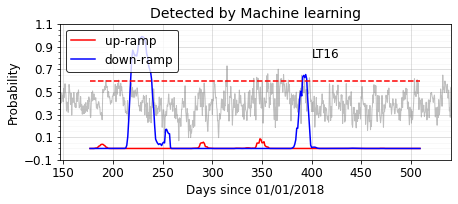

im= 12


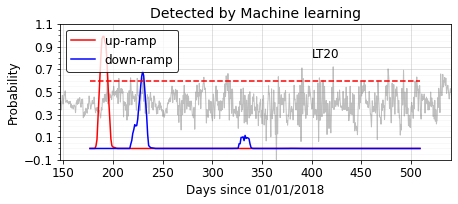

In [3]:
# import numpy as np
import h5py
import os
file =  '/home/bhe/Icey/Alaska2/output_shallow_station-bp1'
os.chdir(file)
location = 'SNR345_56w1/'
os.mkdir(location)
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
pred_YY = np.zeros((13,333))
pred_UU = np.zeros((13,333))
fs = 14
fb = 12
smooth_num = 5
## Apply the trained model to long-time real data
for im in range(13):
    print('im=',im)
    with h5py.File('data_real_press_Alaska_'+str(im+1)+'_1dlpf.h5', 'r') as f1:
        X1 = f1['X'][:]
        Y1 = f1['Y'][:]
        Z1 = f1['Z'][:]
        site = f1['name'][:]


    data_X = X1.reshape(-1,1440,1)
    data_Y = Y1

    #%% Data Preprocessing

    test_X = data_X.astype('float32')
    test_Y = data_Y.astype('float32')

    # test_X.shape,test_Y.shape,Z1.shape
    site2 = 'SNR345_' + site[0].decode('utf-8')
    
    pred_Y = model_m.predict(test_X)
    pred_YY[im,:] = smooth(pred_Y[:,1],smooth_num)
    pred_UU[im,:] = smooth(pred_Y[:,2],smooth_num)
    
    ## Show the results
    fig, ax = plt.subplots(figsize=(7, 2.5))
    time= np.arange(147,540,1/24)
    name = str(site[0].decode('utf-8'))
    ax.plot(time,(Z1[0:-1])/10+0.4,linewidth=1.0,
            color = 'gray', alpha=0.5)
    ax.text(400,0.8,name,fontsize=fb)
    
    test_X = np.arange(333)+177
    ax.plot(test_X,smooth(pred_Y[:,1],smooth_num), 'r', label='up-ramp')
    ax.plot(test_X,smooth(pred_Y[:,2],smooth_num), 'b', label='down-ramp')
    
    pred_Y2 = np.ones((pred_Y.shape[0]))*0.6
    ax.plot(test_X,pred_Y2, 'r--')

    ax.legend(fontsize=fb,loc='upper left',edgecolor='k')
    ax.set_ylim(-0.1,1.1)
    ax.set_xlim(147,540)
#     ax.grid(True)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(-0.1, 1.1, 0.2)
    minor_ticks = np.arange(-0.1, 1.1, 0.05)    
#     ax.set_xticks(major_ticks)
#     ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.1)
    ax.grid(which='major', alpha=0.5)
    
    ax.xaxis.set_tick_params(labelsize=fb)
    ax.yaxis.set_tick_params(labelsize=fb)
    ax.set_title('Detected by Machine learning', fontsize=fs)
    ax.set_xlabel('Days since 01/01/2018',fontsize=fb)
    ax.set_ylabel('Probability',fontsize=fb)

    plt.savefig(location+'Detection_reuslt_'+str(im+1)+'_'+str(site2)+'.pdf')
    plt.show()
     

In [4]:
## save data
np.savetxt(location+'pred_YY.txt', pred_YY)
np.savetxt(location+'pred_UU.txt', pred_UU)